## ArUco markers example
Ref - 
1. https://www.pyimagesearch.com/2020/12/14/generating-aruco-markers-with-opencv-and-python/
2. Online ArUco generator https://chev.me/arucogen/

### Load Package

In [1]:
import cv2
import numpy as np
import os

from matplotlib import pyplot as plt

In [2]:
cv2.__version__

'4.2.0'

### Constant

In [3]:
# ArUco Dictionary (DICT_NxN_M) -- Define the mapping between ArUco marker and encoded ID
# NXN -- 2D bit size of the ArUco marker.
# M -- Total number of unique ArUco IDs. 
#      Larger bit size with smaller unique ID increases the inter-marker distance
#      => Less prone to false readings
ARUCO_DICT = {
    "DICT_4X4_50": cv2.aruco.DICT_4X4_50,
    "DICT_4X4_100": cv2.aruco.DICT_4X4_100,
    "DICT_4X4_250": cv2.aruco.DICT_4X4_250,
    "DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
    "DICT_5X5_50": cv2.aruco.DICT_5X5_50,
    "DICT_5X5_100": cv2.aruco.DICT_5X5_100,
    "DICT_5X5_250": cv2.aruco.DICT_5X5_250,
    "DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
    "DICT_6X6_50": cv2.aruco.DICT_6X6_50,
    "DICT_6X6_100": cv2.aruco.DICT_6X6_100,
    "DICT_6X6_250": cv2.aruco.DICT_6X6_250,
    "DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
    "DICT_7X7_50": cv2.aruco.DICT_7X7_50,
    "DICT_7X7_100": cv2.aruco.DICT_7X7_100,
    "DICT_7X7_250": cv2.aruco.DICT_7X7_250,
    "DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
    "DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
    "DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
    "DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
    "DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
    "DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11}

### Parameter

In [14]:
ARUCO_DICT_TYPE = 'DICT_7X7_100'
ARUCO_BORDER_NBIT = 1           # width of the marker border in bits
ARUCO_IMG_SIZE = 300            # size of the image in pixels

### Initialize ArUco Dictionary

In [15]:
aruco_dict = cv2.aruco.Dictionary_get(ARUCO_DICT[ARUCO_DICT_TYPE])

### Create ArUco Marker

In [16]:
def create_aruco_marker(aruco_dict, ids):
    markers = []
    for id in ids:
        marker = np.zeros((ARUCO_IMG_SIZE, ARUCO_IMG_SIZE, 1), dtype=np.uint8)
        _ = cv2.aruco.drawMarker(aruco_dict, id, ARUCO_IMG_SIZE, marker, ARUCO_BORDER_NBIT)
        markers.append(marker)

    return markers

### ArUco Marker Visualization

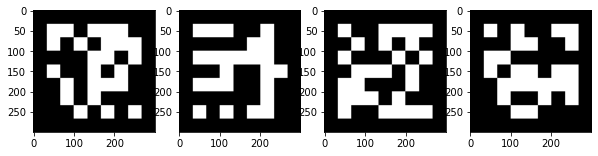

In [17]:
# Marker IDs
marker_ids = [0, 1, 2, 3]

# Create & Plot marker
fig = plt.figure(figsize=[10, 4])
for mid, marker in enumerate(create_aruco_marker(aruco_dict, marker_ids)):
    plt.subplot(1, len(marker_ids), mid + 1)
    plt.imshow(marker[..., 0], cmap='gray')